In [22]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Odds and Addends

## Odds

One way to represent a probability is with a number between 0 and 1, but
that’s not the only way. If you have ever bet on a football game or a
horse race, you have probably encountered another representation of
probability, called **odds**.

You might have heard expressions like “the odds are three to one,” but
you might not know what that means. The **odds in favor**
of an event are the ratio of the probability it will occur to the
probability that it will not.

So if I think my team has a 75% chance of winning, I would say that the
odds in their favor are three to one, because the chance of winning is
three times the chance of losing.

You can write odds in decimal form, but it is most common to write them
as a ratio of integers. So “three to one” is written $3:1$.

When probabilities are low, it is more common to report the **odds
against** rather than the odds in favor. For example, if I think
my horse has a 10% chance of winning, I would say that the odds against
are $9:1$.

Probabilities and odds are different representations of the same
information. Given a probability, you can compute the odds like this:

In [23]:
def Odds(p):
    return p / (1-p)

Odds(0.1)

0.11111111111111112

Given the odds in favor, in decimal form, you can convert to probability
like this:

In [24]:
def Probability(o):
    return o / (o+1)

Probability(1/9.)

0.09999999999999999

If you represent odds with a numerator and denominator, you can convert
to probability like this:

In [25]:
def Probability2(yes, no):
    return float(yes) / (yes + no)

Probability2(1, 9)

0.1

When I work with odds in my head, I find it helpful to picture people at
the track. If 20% of them think my horse will win, then 80% of them
don’t, so the odds in favor are $20:80$ or $1:4$.

In [26]:
Probability2(20, 80)

0.2

If the odds are $5:1$ against my horse, then five out of six people
think she will lose, so the probability of winning is $1/6$.

In [27]:
1 - Probability2(5, 1)

0.16666666666666663

## The odds form of Bayes’s theorem

In Chapter [intro] I wrote Bayes’s theorem in the **probability
form**:

$$\mathrm{p}(H|D) = \frac{\mathrm{p}(H)\mathrm{p}(D|H)}{\mathrm{p}(D)}$$

If we have two hypotheses, $A$ and $B$, we can write the ratio of
posterior probabilities like this:

$$\frac{\mathrm{p}(A|D)}{\mathrm{p}(B|D)} = \frac{\mathrm{p}(A)\mathrm{p}(D|A)}{\mathrm{p}(B)\mathrm{p}(D|B)}$$
                                        
Notice that the normalizing constant, $\mathrm{p}(D)$, drops out of this equation.

If $A$ and $B$ are mutually exclusive and collectively exhaustive, that
means ${{\mathrm{p}(B)}} = 1 - {{\mathrm{p}(A)}}$,
so we can rewrite the ratio of the priors, and the ratio of the
posteriors, as odds.

Writing <span>$\mathrm{o}(A)$</span> for odds in favor of $A$, we get:

$${{\mathrm{o}(A|D)}} = {{\mathrm{o}(A)}}~\frac{{{\mathrm{p}(D|A)}}}{{{\mathrm{p}(D|B)}}}$$

In words, this says that the posterior odds are the prior odds times the
likelihood ratio. This is the <span>**odds form**</span> of Bayes’s
theorem.

This form is most convenient for computing a Bayesian update on paper or
in your head. For example, let’s go back to the cookie problem:

> Suppose there are two bowls of cookies. Bowl 1 contains 30 vanilla
> cookies and 10 chocolate cookies. Bowl 2 contains 20 of each.
>
> Now suppose you choose one of the bowls at random and, without
> looking, select a cookie at random. The cookie is vanilla. What is the
> probability that it came from Bowl 1?

The prior probability is 50%, so the prior odds are $1:1$, or just 1.
The likelihood ratio is $\frac{3}{4} / \frac{1}{2}$, or $3/2$. So the
posterior odds are $3:2$, which corresponds to probability $3/5$.

## Oliver’s blood

Here is another problem from MacKay’s *Information Theory,
Inference, and Learning Algorithms*:

> Two people have left traces of their own blood at the scene of a
> crime. A suspect, Oliver, is tested and found to have type ‘O’ blood.
> The blood groups of the two traces are found to be of type ‘O’ (a
> common type in the local population, having frequency 60%) and of type
> ‘AB’ (a rare type, with frequency 1%). Do these data [the traces found
> at the scene] give evidence in favor of the proposition that Oliver
> was one of the people [who left blood at the scene]?

To answer this question, we need to think about what it means for data
to give evidence in favor of (or against) a hypothesis. Intuitively, we
might say that data favor a hypothesis if the hypothesis is more likely
in light of the data than it was before.

In the cookie problem, the prior odds are $1:1$, or probability 50%. The
posterior odds are $3:2$, or probability 60%. So we could say that the
vanilla cookie is evidence in favor of Bowl 1.

The odds form of Bayes’s theorem provides a way to make this intuition
more precise. Again

$${{\mathrm{o}(A|D)}} = {{\mathrm{o}(A)}}~\frac{{{\mathrm{p}(D|A)}}}{{{\mathrm{p}(D|B)}}}$$

Or dividing through by <span>$\mathrm{o}(A)$</span>:

$$\frac{{{\mathrm{o}(A|D)}}}{{{\mathrm{o}(A)}}} = \frac{{{\mathrm{p}(D|A)}}}{{{\mathrm{p}(D|B)}}}$$

The term on the left is the ratio of the posterior and prior odds. The
term on the right is the likelihood ratio, also called the <span>**Bayes
factor**</span>.

If the Bayes factor value is greater than 1, that means that the data
were more likely under $A$ than under $B$. And since the odds ratio is
also greater than 1, that means that the odds are greater, in light of
the data, than they were before.

If the Bayes factor is less than 1, that means the data were less likely
under $A$ than under $B$, so the odds in favor of $A$ go down.

Finally, if the Bayes factor is exactly 1, the data are equally likely
under either hypothesis, so the odds do not change.

Now we can get back to the Oliver’s blood problem. If Oliver is one of
the people who left blood at the crime scene, then he accounts for the
‘O’ sample, so the probability of the data is just the probability that
a random member of the population has type ‘AB’ blood, which is 1%.

If Oliver did not leave blood at the scene, then we have two samples to
account for. If we choose two random people from the population, what is
the chance of finding one with type ‘O’ and one with type ‘AB’? Well,
there are two ways it might happen: the first person we choose might
have type ‘O’ and the second ‘AB’, or the other way around. So the total
probability is $2 (0.6) (0.01) = 1.2\%$.

The likelihood of the data is slightly higher if Oliver is
<span>*not*</span> one of the people who left blood at the scene, so the
blood data is actually evidence against Oliver’s guilt.

This example is a little contrived, but it is an example of the
counterintuitive result that data <span>*consistent*</span> with a
hypothesis are not necessarily <span>*in favor of*</span> the
hypothesis.

If this result is so counterintuitive that it bothers you, this way of
thinking might help: the data consist of a common event, type ‘O’ blood,
and a rare event, type ‘AB’ blood. If Oliver accounts for the common
event, that leaves the rare event still unexplained. If Oliver doesn’t
account for the ‘O’ blood, then we have two chances to find someone in
the population with ‘AB’ blood. And that factor of two makes the
difference.

## Addends

The fundamental operation of Bayesian statistics is <span>Update</span>,
which takes a prior distribution and a set of data, and produces a
posterior distribution. But solving real problems usually involves a
number of other operations, including scaling, addition and other
arithmetic operations, max and min, and mixtures.

This chapter presents addition and max; I will present other operations
as we need them.

The first example is based on <span>*Dungeons & Dragons*</span>, a
role-playing game where the results of players’ decisions are usually
determined by rolling dice. In fact, before game play starts, players
generate each attribute of their characters—strength, intelligence,
wisdom, dexterity, constitution, and charisma—by rolling three 6-sided
dice and adding them up.

So you might be curious to know the distribution of this sum. There are
two ways you might compute it:

Simulation:
:   Given a PMF that represents the distribution for a single die, you
    can draw random samples, add them up, and accumulate the
    distribution of simulated sums.

Enumeration:
:   Given two PMFs, you can enumerate all possible pairs of values and
    compute the distribution of the sums.

Here’s an example of the simulation approach.

In [28]:
n_dies=3
n_rolls=1000

xk_s, counts_simulation = np.unique(np.random.randint(1,7,(n_rolls,n_dies)).sum(axis=1),return_counts=True)
pk_s = counts_simulation / counts_simulation.sum()

Fistly, we create an `n_rolls` by `n_dies` array filled with random integers from 1 to 6 using the `np.random.randint` function. Then we calculate the sum along the `n_dies` dimension to get the sum of three dice. Then, using `np.unique` function with `return_counts=True` we get the unique sums and their counts they appear in the simulated dataset. Finally, normalizing the counts we obtain the PMF based on the simulated data. The simulated distribution is shown in Figure 5.1.  

The drawback of simulation is that the result is only approximately correct.
As `n_rolls` gets larger, it gets more accurate, but of course the run time increases
as well.

The other approach is to enumerate all pairs of values and compute the sum
and probability of each pair.

In [40]:
v = np.array([1,2,3,4,5,6])
p = np.full_like(v,1/v.size,dtype=float)

mg_vals= np.array(np.meshgrid(v,v,v)).T.reshape(-1,3).sum(axis=1)
xk_a, idx, counts = np.unique(mg_vals,return_counts=True,return_index=True)
mg_pk=np.array(np.meshgrid(p,p,p)).T.reshape(-1,3).prod(axis=1)
pk_a=mg_pk[idx]*counts

**Code explanation is needed**

The analytical distribution is shown in Figure 5.1.

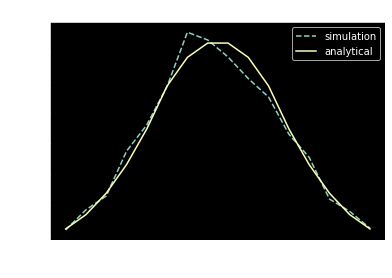

In [43]:
plt.plot(xk_s, pk_s, '--', label = 'simulation')
plt.plot(xk_a, pk_a, label = 'analytical')
plt.xlabel('Sum of three 6-sided dice xk');
plt.ylabel('Probability pk');
plt.legend()
plt.title('Figure 5.1');

## Maxima

When you generate a *Dungeons & Dragons*
character, you are
particularly interested in the character’s best attributes, so you might
like to know the distribution of the maximum attribute.

There are three ways to compute the distribution of a maximum:

**Simulation**:

    Given a Pmf that represents the distribution for a single selection,
    you can generate random samples, find the maximum, and accumulate
    the distribution of simulated maxima.

**Enumeration**:

    Given two Pmfs, you can enumerate all possible pairs of values and
    compute the distribution of the maximum.

**Exponentiation**:

    If we convert a Pmf to a Cdf, there is a simple and efficient
    algorithm for finding the Cdf of the maximum.

The code to simulate maxima is almost identical to the code for
simulating sums:

In [0]:
def RandomMax(dists):
    total = max(dist.Random() for dist in dists)
    return total

def SampleMax(dists, n):
    pmf = MakePmfFromList(RandomMax(dists) for i in xrange(n))
    return pmf

All I did was replace “sum” with “max”. And the code for enumeration is
almost identical, too:

In [0]:
def PmfMax(pmf1, pmf2):
    res = thinkbayes.Pmf()
    for v1, p1 in pmf1.Items():
        for v2, p2 in pmf2.Items():
            res.Incr(max(v1, v2), p1*p2)
    return res

In fact, you could generalize this function by taking the appropriate
operator as a parameter.

The only problem with this algorithm is that if each Pmf has $m$ values,
the run time is proportional to $m^2$. And if we want the maximum of
`k` selections, it takes time proportional to $k m^2$.

If we convert the Pmfs to Cdfs, we can do the same calculation much
faster! The key is to remember the definition of the cumulative
distribution function: 

$$CDF(x) = {{\mathrm{p}(X \le~x)}}$$

where $X$ is a random variable that means “a value chosen randomly from
this distribution.” So, for example, $CDF(5)$ is the probability that a
value from this distribution is less than or equal to 5.

If I draw $X$ from $CDF_1$ and $Y$ from $CDF_2$, and compute the maximum
$Z = max(X, Y)$, what is the chance that $Z$ is less than or equal to 5?
Well, in that case both $X$ and $Y$ must be less than or equal to 5.

If the selections of $X$ and $Y$ are independent,

$$CDF_3(5) = CDF_1(5) CDF_2(5)$$ 

where $CDF_3$ is the distribution of
$Z$. I chose the value 5 because I think it makes the formulas easy to
read, but we can generalize for any value of $z$:

$$CDF_3(z) = CDF_1(z) CDF_2(z)$$ 

In the special case where we draw $k$
values from the same distribution,

$$CDF_k(z) = CDF_1(z)^k$$ 

So to find
the distribution of the maximum of $k$ values, we can enumerate the
probabilities in the given Cdf and raise them to the $k$th power. `Cdf`
provides a method that does just that:

```python
# class Cdf

    def Max(self, k):
        cdf = self.Copy()
        cdf.ps = [p**k for p in cdf.ps]
        return cdf
```

`Max` takes the number of selections, <span>k</span>, and returns a new
Cdf that represents the distribution of the maximum of <span>k</span>
selections. The run time for this method is proportional to $m$, the
number of items in the Cdf.

`Pmf.Max` does the same thing for Pmfs. It has to do a little more work
to convert the Pmf to a Cdf, so the run time is proportional to
$m \log m$, but that’s still better than quadratic.

Finally, here’s an example that computes the distribution of a
character’s best attribute:

In [0]:
best_attr_cdf = three_exact.Max(6)
best_attr_pmf = best_attr_cdf.MakePmf()
best_attr_pmf.Print()

Where `three_exact` is defined in the previous section. If we print the
results, we see that the chance of generating a character with at least
one attribute of 18 is about 3%. Figure [fig.dungeons2] shows the
distribution.

In [0]:
import matplotlib.pyplot as plt
xs = list(range(3,19))
ps = best_attr_pmf.Probs(xs)
plt.plot(xs, ps);

## Mixtures

Let’s do one more example from *Dungeons & Dragons*.
Suppose I have a box of dice with the following inventory:

    5   4-sided dice
    4   6-sided dice
    3   8-sided dice
    2  12-sided dice
    1  20-sided die

I choose a die from the box and roll it. What is the distribution of the
outcome?

If you know which die it is, the answer is easy. A die with
<span>n</span> sides yields a uniform distribution from 1 to
<span>n</span>, including both.

But if we don’t know which die it is, the resulting distribution is a
<span>**mixture**</span> of uniform distributions with different bounds.
In general, this kind of mixture does not fit any simple mathematical
model, but it is straightforward to compute the distribution in the form
of a PMF.

As always, one option is to simulate the scenario, generate a random
sample, and compute the PMF of the sample. This approach is simple and
it generates an approximate solution quickly. But if we want an exact
solution, we need a different approach.

Let’s start with a simple version of the problem where there are only
two dice, one with 6 sides and one with 8. We can make a Pmf to
represent each die:

In [0]:
d6 = Die(6)
d8 = Die(8)

Then we create a Pmf to represent the mixture:

In [0]:
mix = thinkbayes.Pmf()
for die in [d6, d8]:
    for outcome, prob in die.Items():
        mix.Incr(outcome, prob)
mix.Normalize()
mix.Print()

The first loop enumerates the dice; the second enumerates the outcomes
and their probabilities. Inside the loop, `Pmf.Incr` adds up
the contributions from the two distributions.

This code assumes that the two dice are equally likely. More generally,
we need to know the probability of each die so we can weight the
outcomes accordingly.

First we create a Pmf that maps from each die to the probability it is
selected:

In [0]:
pmf_dice = thinkbayes.Pmf()
pmf_dice.Set(Die(4), 5)
pmf_dice.Set(Die(6), 4)
pmf_dice.Set(Die(8), 3)
pmf_dice.Set(Die(12), 2)
pmf_dice.Set(Die(20), 1)
pmf_dice.Normalize()

Next we need a more general version of the mixture algorithm:

In [0]:
mix = thinkbayes.Pmf()
for die, weight in pmf_dice.Items():
    for outcome, prob in die.Items():
        mix.Incr(outcome, weight*prob)

Now each die has a weight associated with it (which makes it a weighted
die, I suppose). When we add each outcome to the mixture, its
probability is multiplied by <span>weight</span>.

In [0]:
colors = thinkplot.Brewer.Colors()
thinkplot.Hist(mix, width=0.9, color=colors[4])

This shows the result. As expected, values 1 through 4
are the most likely because any die can produce them. Values above 12
are unlikely because there is only one die in the box that can produce
them (and it does so less than half the time).

`thinkbayes`provides a function named
`MakeMixture` that encapsulates this algorithm, so we could
have written:

```python```
        mix = thinkbayes.MakeMixture(pmf_dice)
```

We’ll use <span>MakeMixture</span> again in Chapters [prediction] and
 [observer].

## Discussion

Other than the odds form of Bayes’s theorem, this chapter is not
specifically Bayesian. But Bayesian analysis is all about distributions,
so it is important to understand the concept of a distribution well.
From a computational point of view, a distribution is any data structure
that represents a set of values (possible outcomes of a random process)
and their probabilities.

We have seen two representations of distributions: Pmfs and Cdfs. These
representations are equivalent in the sense that they contain the same
information, so you can convert from one to the other. The primary
difference between them is performance: some operations are faster and
easier with a Pmf; others are faster with a Cdf.

The other goal of this chapter is to introduce operations that act on
distributions, like `Pmf.__add__`, `Cdf.Max`, and
`thinkbayes.MakeMixture`. We will use these operations later,
but I introduce them now to encourage you to think of a distribution as
a fundamental unit of computation, not just a container for values and
probabilities.